# [Transforming Data](https://docs.activeloop.ai/en/latest/concepts/transform.html#transform)
This notebook shows how we can transform `hub.Dataset`'s. 

In [ ]:
# first we install hub
# runtime enviroment

!pip install hub

**Note**: Restart the colab runtime as few packages has been updated or you may get error (<font color="red">FileNotFoundError</font>)

In [2]:
import hub
from hub.schema import ClassLabel, Image, Tensor
from hub import Dataset, transform, schema
from skimage.transform import resize
from skimage import img_as_ubyte

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

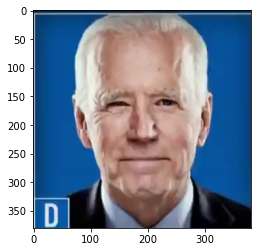

In [3]:
# lets fetch our original hub.Dataset
tag = "mynameisvinn/faces"
ds = hub.Dataset(tag)
plt.imshow(ds['image', 0].compute())

## Transform
Let's say we want to resize the images (from `224x224x3` to `24x24x3`) in our dataset, a common operation in computer vision pipelines.

Without Hub, we would have to read every image into memory (possibly from a remote data store like s3), apply a resizing operation, and then save it. This simple sequence could potentially take lots of wall time, mostly with read/writes.

With Hub, we could appy this transformation without moving bytes back and forth.

In [4]:
new_schema = {
    "resized_image": Image(shape=(24, 24, 3), dtype="uint8"),
    "label": ClassLabel(num_classes=2)
}

@transform(schema=new_schema)
def resize_transform(sample):
    
    image = resize(sample['image'].compute(), (24, 24, 3), anti_aliasing=True)
    image = img_as_ubyte(image)  # recast from float to uint8
    label = int(sample['label'].compute())
    
    return {
        "resized_image": image,
        "label": label
    }

In [5]:
ds2 = resize_transform(ds)  # transform object

In [6]:
tag = "mynameisvinn/resized_faces"
ds3 = ds2.store(tag)

Computing the transormation: 100%|██████████| 27.0/27.0 [00:01<00:00, 15.3 items/s]


## Verify
We can verify results by fetching an instance from the resized dataset.

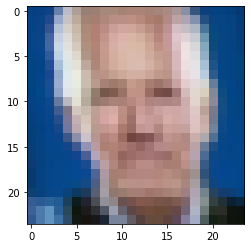

In [8]:
img = ds3["resized_image", 3].compute()
plt.imshow(img)